In [9]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
!pip install numpy pandas pillow matplotlib

Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 63.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 91.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

流式输出内容被截断，只能显示最后 5000 行内容。
round:95001
round:95002
round:95003
round:95004
round:95005
round:95006
round:95007
round:95008
round:95009
round:95010
round:95011
round:95012
round:95013
round:95014
round:95015
round:95016
round:95017
round:95018
round:95019
round:95020
round:95021
round:95022
round:95023
round:95024
round:95025
round:95026
round:95027
round:95028
round:95029
round:95030
round:95031
round:95032
round:95033
round:95034
round:95035
round:95036
round:95037
round:95038
round:95039
round:95040
round:95041
round:95042
round:95043
round:95044
round:95045
round:95046
round:95047
round:95048
round:95049
round:95050
round:95051
round:95052
round:95053
round:95054
round:95055
round:95056
round:95057
round:95058
round:95059
round:95060
round:95061
round:95062
round:95063
round:95064
round:95065
round:95066
round:95067
round:95068
round:95069
round:95070
round:95071
round:95072
round:95073
round:95074
round:95075
round:95076
round:95077
round:95078
round:95079
round:95080
round:95081
r

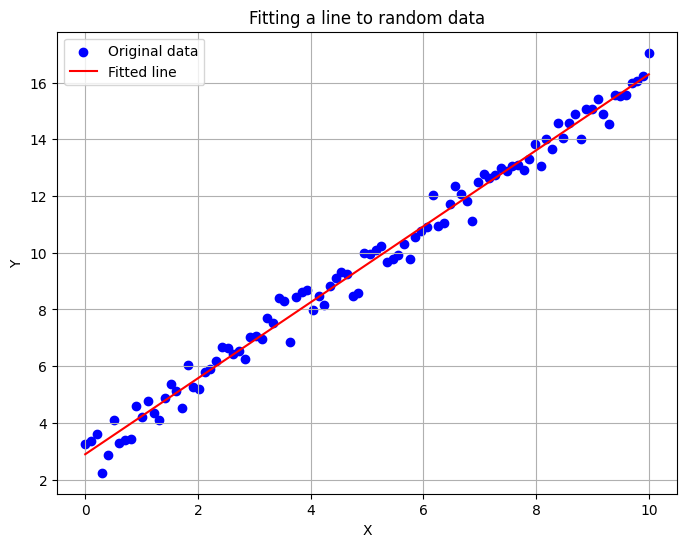

In [17]:
# cuda
import matplotlib.pyplot as plt
import numpy as np
import torch

# 线性回归训练代码
def compute_error_for_line_given_points(b, w, points):
    totalError = 0
    N = float(len(points))
    for i in range(len(points)):
        x = points[i][0]
        y = points[i][1]
        totalError += (y - (w * x + b)) ** 2
    return totalError / N

def step_gradient(b_current, w_current, points, learningRate):
    b_gradient = torch.tensor(0.0, device=points.device)
    w_gradient = torch.tensor(0.0, device=points.device)
    N = float(len(points))
    for i in range(len(points)):
        x = points[i][0]
        y = points[i][1]
        b_gradient += -(2 / N) * (y - (w_current * x + b_current))
        w_gradient += -(2 / N) * x * (y - (w_current * x + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_w = w_current - (learningRate * w_gradient)
    return [new_b, new_w]

def gradient_descent_runner(points, starting_b, starting_w, learningRate, num_iterations):
    b = torch.tensor(starting_b, device=points.device)
    w = torch.tensor(starting_w, device=points.device)
    for i in range(num_iterations):
        print("round:" + str(i))
        b, w = step_gradient(b, w, points, learningRate)
    return [b, w]

def run():
    points_np = np.genfromtxt("/content/drive/MyDrive/PT/data1.csv", delimiter=',').astype(np.float64)
    points = torch.tensor(points_np, device='cuda')
    learning_rate = 0.0001
    initial_b = 0.0
    initial_w = 0.0
    num_iterations = 100000
    [b, w] = gradient_descent_runner(points, initial_b, initial_w, learning_rate, num_iterations)
    print("After gradient descent at b={0}, w={1}, error={2}".format(b.item(), w.item(),
                                                                   compute_error_for_line_given_points(b, w, points)))
    return b.item(), w.item()

# 运行线性回归
final_b, final_w = run()

# 绘制图像
points_np = np.genfromtxt("/content/drive/MyDrive/PT/data1.csv", delimiter=',').astype(np.float64)
x = points_np[:, 0]
y = points_np[:, 1]

x_range = np.linspace(min(x), max(x), 100)
y_pred = final_w * x_range + final_b

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Original data')
plt.plot(x_range, y_pred, color='red', label='Fitted line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fitting a line to random data')
plt.legend()
plt.grid(True)
plt.savefig('/content/drive/MyDrive/PT/print1.png')
plt.show()
